<a href="https://colab.research.google.com/github/varma1225/dataAnalytics/blob/main/customer_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
df=pd.read_csv("/content/amazon_reviews.csv.zip")

In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
df.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


1.Unnamed: 0: This likely represents an index or a unique identifier for each review. It might be automatically generated when the data was created.

2.reviewerName: The name of the reviewer who wrote the review.

3.overall: The overall rating given by the reviewer (likely on a scale of 1 to 5).

4.reviewText: The actual text content of the review written by the reviewer.

5.reviewTime: The date and time when the review was submitted.

6.day_diff: This might represent the difference in days between the review submission date and a reference date.

7.helpful_yes: The number of users who found the review helpful.

8.helpful_no: The number of users who did not find the review helpful.

9.total_vote: The total number of votes (helpful_yes + helpful_no) the review received.

10.score_pos_neg_diff: The difference between positive (helpful_yes) and negative (helpful_no) votes.

10.score_average_rating: This might represent an average rating or score calculated based on helpfulness votes.

11.wilson_lower_bound: This likely represents the lower bound of the Wilson score interval, a statistical method used to calculate confidence intervals for ratings or proportions. It's often used to rank items with different numbers of votes.

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


In [ ]:
df.dropna()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


In [ ]:
df.dropna()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


In [ ]:
df.dropna()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4910,False
4911,False
4912,False
4913,False


In [ ]:
# prompt: remove null and duplicate vaalues

df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [ ]:
# prompt: Overview of the dataset.

df.describe()



,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


df.describe: it represents the overview of thee numerical columns in the data sets

count: The number of non-missing values in each column.
mean: The average value.
std: The standard deviation (a measure of data spread).
min: The minimum value.
25%: The 25th percentile (the value below which 25% of the data falls).
50%: The 50th percentile (also known as the median).
75%: The 75th percentile.
max: The maximum value.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


df.info: It provides a concise summary of the DataFrame's structure and data types.

In [ ]:
# prompt: Impute numerical columns with mean or median.

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Impute with mean or median
for col in numerical_cols:
    if df[col].isnull().any():
        if df[col].skew() > 0.5 or df[col].skew() < -0.5:  # Check for skewness
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())


first we have to find the numerical columns in the datasets that have missing values and we have choose an imputation method like mean or mmedian to fill in the missing  values in the numerical column

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


In [ ]:
df.fillna(0)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,0,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
# prompt: Drop rows with missing review text.

df.dropna(subset=['reviewText'], inplace=True)


In [ ]:
# prompt: Remove duplicate rows, if any.

df.drop_duplicates(inplace=True)


In [ ]:
# prompt: Remove stopwords, punctuation, and numbers.

import nltk
import re
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Lowercase the text
    text = text.lower()

    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

# Example usage (assuming you have a DataFrame called 'df'):
if 'df' in locals():
  if 'reviewText' in df.columns:
    df['cleaned_review'] = df['reviewText'].apply(clean_text)
    print(df[['reviewText', 'cleaned_review']].head())
  else:
    print("Error: 'reviewText' column not found in DataFrame")
else:
  print("Error: 'df' DataFrame not found. Please load or create it.")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


AttributeError: 'int' object has no attribute 'translate'

In [ ]:
# prompt:  Remove stopwords, punctuation, and numbers. check that

# Assuming df and the clean_text function are defined as in the previous code.

# Check if 'cleaned_review' column exists and if not, apply the cleaning function.
if 'cleaned_review' not in df.columns:
    df['cleaned_review'] = df['reviewText'].apply(clean_text)

# Verification: Print the first few rows to see the effect of the cleaning.
print(df[['reviewText', 'cleaned_review']].head())

# Verification: Check for the presence of punctuation, numbers, and stopwords in the cleaned text
for index, row in df.head().iterrows():  # Check the first 5 rows for brevity.
    cleaned_text = row['cleaned_review']

    # Check for punctuation
    punctuation_present = any(char in string.punctuation for char in cleaned_text)
    if punctuation_present:
        print(f"Punctuation found in cleaned review (index {index})")

    # Check for numbers
    numbers_present = bool(re.search(r'\d+', cleaned_text))
    if numbers_present:
        print(f"Numbers found in cleaned review (index {index})")

    # Check for stopwords
    stopwords_present = any(word in stop_words for word in cleaned_text.split())
    if stopwords_present:
        print(f"Stopwords found in cleaned review (index {index})")


                                          reviewText  \
0                                         No issues.   
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   

                                      cleaned_review  
0                                             issues  
1  purchased device worked advertised never much ...  
2  works expected sprung higher capacity think ma...  
3  think worked greathad diff bran gb card went s...  
4  bought retail packaging arrived legit orange e...  


In [ ]:
# prompt: Remove stopwords, punctuation, and numbers.

import nltk
import re
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to string to handle non-string values
    text = str(text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Lowercase the text
    text = text.lower()

    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

# Example usage (assuming you have a DataFrame called 'df'):
if 'df' in locals():
  if 'reviewText' in df.columns:
    df['cleaned_review'] = df['reviewText'].apply(clean_text)
    print(df[['reviewText', 'cleaned_review']].head())
  else:
    print("Error: 'reviewText' column not found in DataFrame")
else:
  print("Error: 'df' DataFrame not found. Please load or create it.")

                                          reviewText  \
0                                         No issues.   
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   

                                      cleaned_review  
0                                             issues  
1  purchased device worked advertised never much ...  
2  works expected sprung higher capacity think ma...  
3  think worked greathad diff bran gb card went s...  
4  bought retail packaging arrived legit orange e...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 STOPWORDS:topwords are common words that occur frequently in a language but generally do not carry significant meaning on their own. Examples in English include "the," "a," "is," "and," "but," etc.
     Stopwords are often removed because they  can
      1.reduce noise
      2.improve effficiency
      3.enchancee accuracy
  Punctuation: it marks  symbols used in writing to separate sentences, clauses, and phrases, and to clarify meaning. Examples include periods (.), commas (,), question marks (?),Punctuation marks are symbols used in writing to separate sentences, clauses, and phrases, and to clarify meaning. Examples include periods (.), commas (,), question marks (?)

  
   Numbers:

What they are: Numbers are numerical values represented by digits (0-9).

In [ ]:
# prompt: Convert text to lowercase.

def clean_text(text):
    # Convert to string to handle non-string values
    text = str(text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Lowercase the text
    text = text.lower()

    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text


In [ ]:
# prompt: Convert text to lowercase

# Check if the 'df' DataFrame and 'reviewText' column exist
if 'df' in locals() and 'reviewText' in df.columns:
    # Apply the clean_text function to the 'reviewText' column
    df['cleaned_review'] = df['reviewText'].apply(clean_text)

    # Print the first few rows of the original and cleaned reviews for verification
    print(df[['reviewText', 'cleaned_review']].head())
else:
    print("Error: 'df' DataFrame or 'reviewText' column not found.")


                                          reviewText  \
0                                         No issues.   
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   

                                      cleaned_review  
0                                             issues  
1  purchased device worked advertised never much ...  
2  works expected sprung higher capacity think ma...  
3  think worked greathad diff bran gb card went s...  
4  bought retail packaging arrived legit orange e...  


here we converted text to lower case so we got cleaned dataset with preprocessed review text.

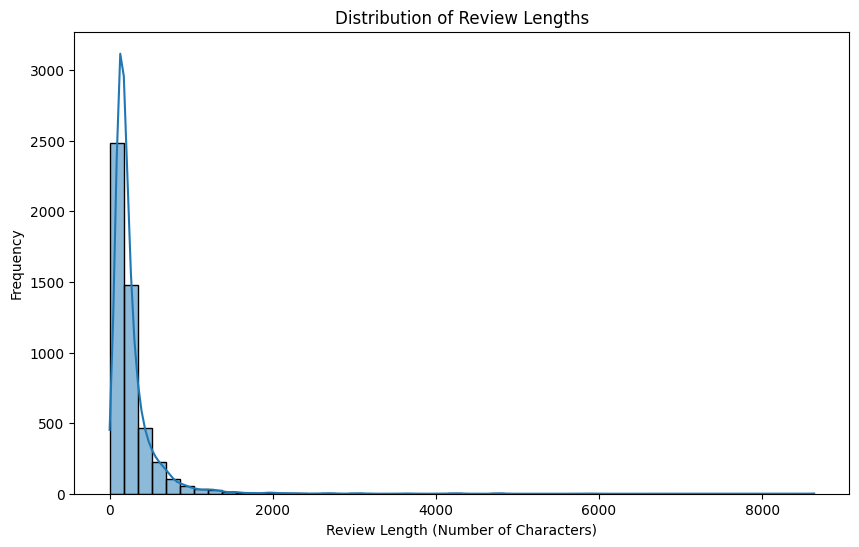

In [ ]:
# prompt: Plot the distribution of review lengths.

# Calculate the length of each review
df['review_length'] = df['reviewText'].astype(str).apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# prompt: Create a word cloud for each sentiment category

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' and sentiment categories are defined
# Example:  df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Group data by sentiment
sentiment_groups = df.groupby('sentiment')

# Function to create and display word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Generate and display word cloud for each sentiment category
for sentiment, group in sentiment_groups:
    text = ' '.join(group['cleaned_review'].astype(str))  # Combine cleaned reviews for the sentiment
    plot_wordcloud(text, f'Word Cloud for {sentiment} Reviews')


KeyError: 'sentiment'

In [ ]:
# prompt: Create a word cloud for each sentiment category

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the 'sentiment' column based on 'overall' ratings
# Reviews with overall rating >= 4 are considered positive
# Reviews with overall rating <= 2 are considered negative
# Reviews with overall rating between 2 and 4 are considered neutral
df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Group data by sentiment
sentiment_groups = df.groupby('sentiment')

# Function to create and display word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Generate and display word cloud for each sentiment category
for sentiment, group in sentiment_groups:
    text = ' '.join(group['cleaned_review'].astype(str))  # Combine cleaned reviews for the sentiment
    plot_wordcloud(text, f'Word Cloud for {sentiment} Reviews')

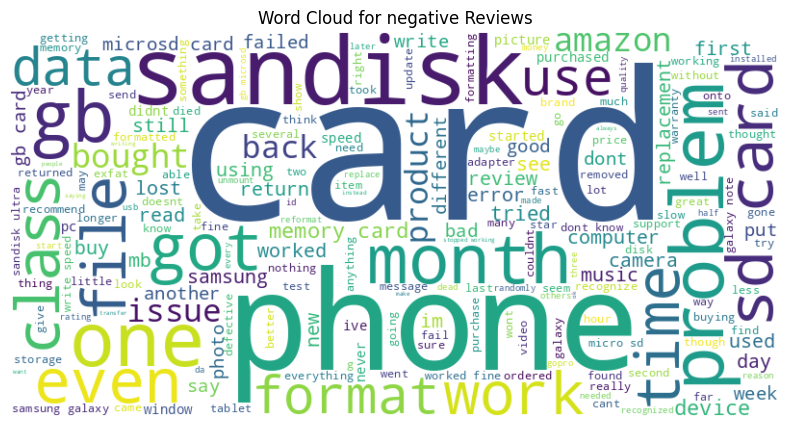

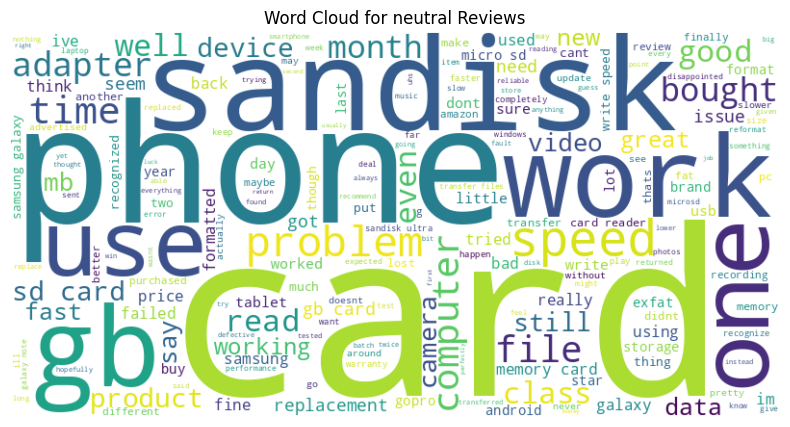

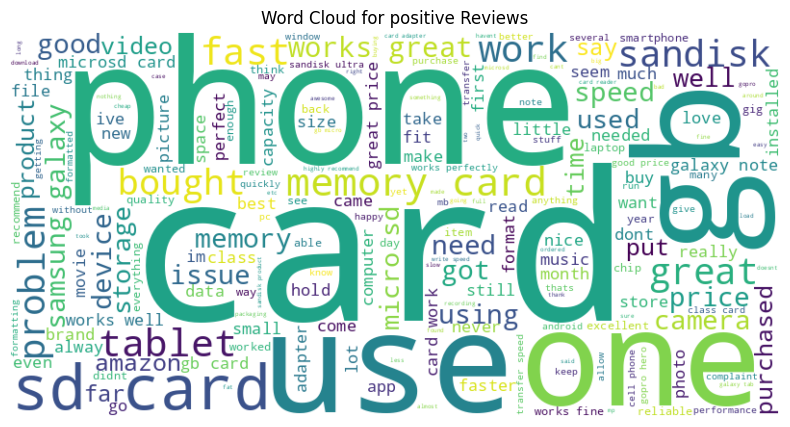

In [ ]:
# prompt: Create a word cloud for each sentiment category

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the 'sentiment' column based on 'overall' ratings
# Reviews with overall rating >= 4 are considered positive
# Reviews with overall rating <= 2 are considered negative
# Reviews with overall rating between 2 and 4 are considered neutral
df['sentiment'] = df['overall'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Group data by sentiment
sentiment_groups = df.groupby('sentiment')

# Function to create and display word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


# Generate and display word cloud for each sentiment category
for sentiment, group in sentiment_groups:
    text = ' '.join(group['cleaned_review'].astype(str))  # Combine cleaned reviews for the sentiment
    plot_wordcloud(text, f'Word Cloud for {sentiment} Reviews')

Word clouds provide a valuable visual representation of sentiment within text data. They allow you to identify dominant themes, key drivers, and compare sentiment across different categories. This makes them an important tool for understanding customer opinions, product feedback, and overall sentiment trends. By revealing patterns and insights that might otherwise be hidden in large volumes of text, word clouds can help inform decision-making and drive improvements.

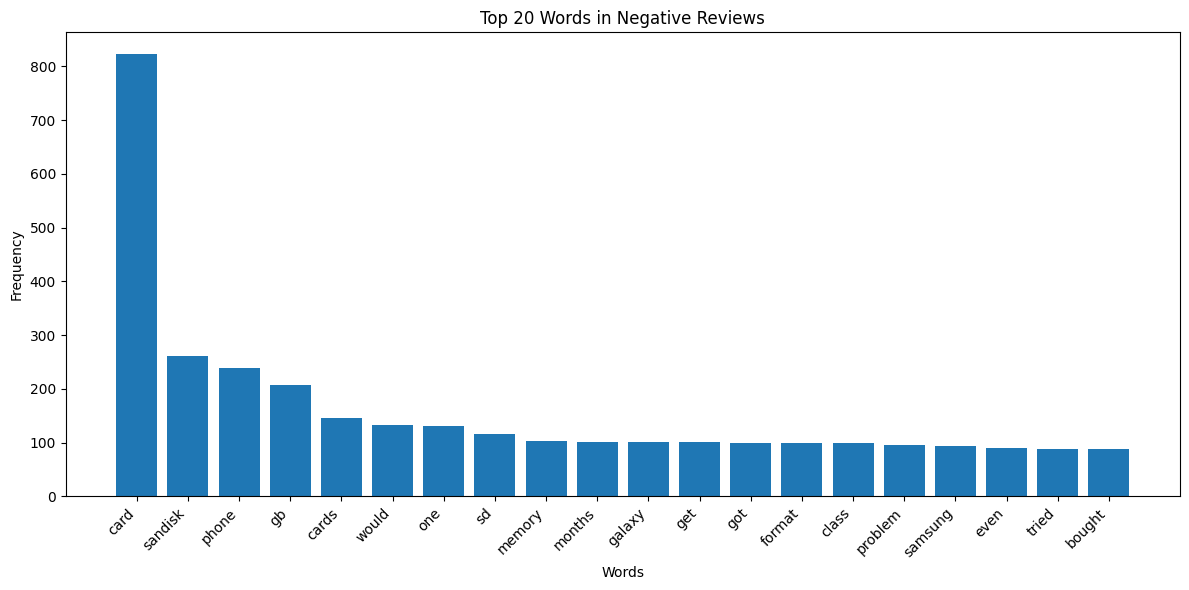

In [ ]:
# prompt: Visualize the frequency of top words in negative reviews.

from collections import Counter

# Assuming 'df' and 'sentiment' column are defined as in the previous code

# Filter for negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Combine all negative reviews into a single string
all_negative_words = ' '.join(negative_reviews.astype(str))

# Tokenize the combined string and count word frequencies
word_counts = Counter(all_negative_words.split())

# Get the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Extract words and frequencies
words, frequencies = zip(*top_20_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Negative Reviews")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


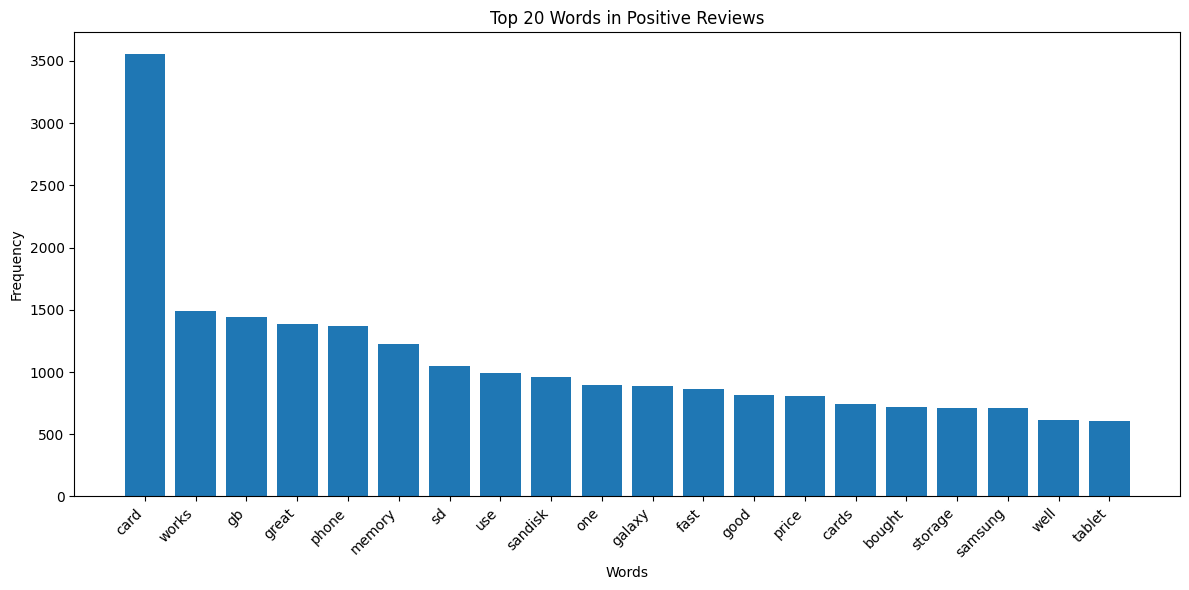

In [ ]:
# prompt: Visualize the frequency of top words in positive reviews.

# Assuming 'df' and 'sentiment' column are defined as in the previous code

# Filter for positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']

# Combine all positive reviews into a single string
all_positive_words = ' '.join(positive_reviews.astype(str))

# Tokenize the combined string and count word frequencies
word_counts = Counter(all_positive_words.split())

# Get the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Extract words and frequencies
words, frequencies = zip(*top_20_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Positive Reviews")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Create numerical features of
# Review length (word count).
# Sentiment polarity (using TextBlob).and dispaly it

!pip install textblob

from textblob import TextBlob

# Assuming 'df' and 'cleaned_review' column exist as in the previous code

# Calculate review length (word count)
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Calculate sentiment polarity
df['sentiment_polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the new features
print(df[['cleaned_review', 'review_length', 'sentiment_polarity']].head())


                                      cleaned_review  review_length  \
0                                             issues              1   
1  purchased device worked advertised never much ...             13   
2  works expected sprung higher capacity think ma...             14   
3  think worked greathad diff bran gb card went s...             28   
4  bought retail packaging arrived legit orange e...             34   

   sentiment_polarity  
0            0.000000  
1           -0.100000  
2            0.129167  
3            0.250000  
4            0.386667  


In [ ]:
# prompt: Perform TF-IDF vectorization on review text.

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' and 'cleaned_review' column exist as in the previous code

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned review text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print some feature names
print("Some feature names:", feature_names[:20])

# You can now use the tfidf_matrix for further analysis,
# such as clustering, classification, or similarity calculations


Shape of TF-IDF matrix: (4915, 9679)
Some feature names: ['aac' 'aas' 'aba' 'abdroid' 'abilities' 'ability' 'able' 'aboutgood'
 'abouti' 'abouttherehere' 'aboutto' 'abovei' 'abroad' 'abruptly'
 'absolute' 'absolutely' 'abt' 'abuse' 'abused' 'abysmal']


TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It's often used as a weighting factor in information retrieval and text mining.



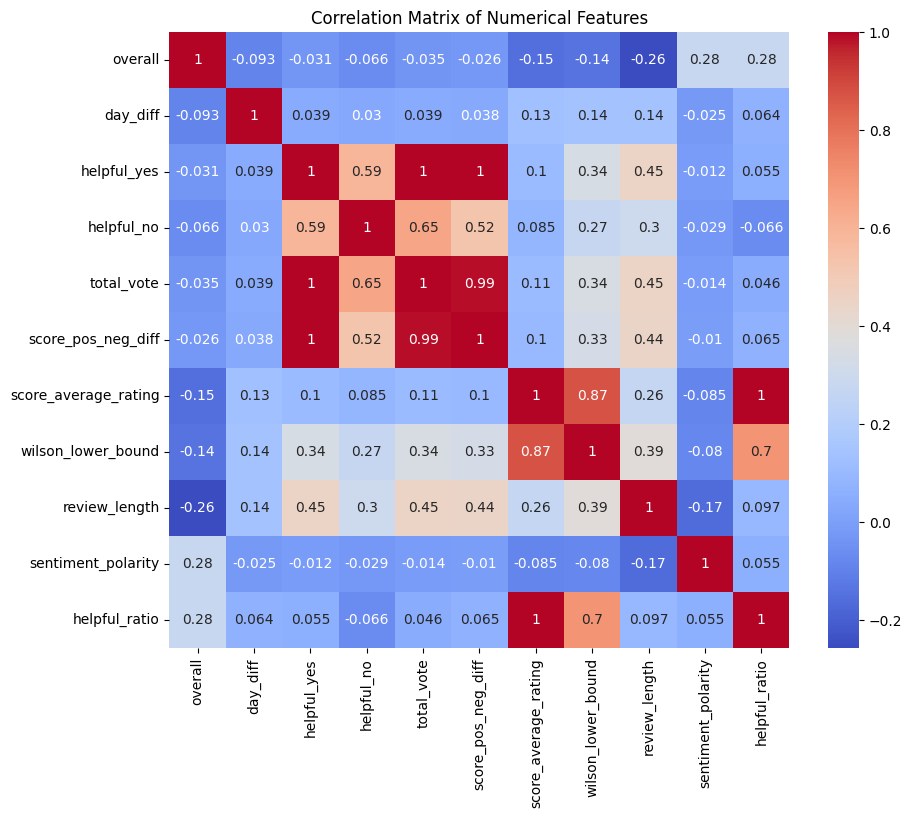


Descriptive Statistics for overall:
count    4915.000000
mean        4.587589
std         0.996845
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

Descriptive Statistics for day_diff:
count    4915.000000
mean      437.367040
std       209.439871
min         1.000000
25%       281.000000
50%       431.000000
75%       601.000000
max      1064.000000
Name: day_diff, dtype: float64

Descriptive Statistics for helpful_yes:
count    4915.000000
mean        1.311089
std        41.619161
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1952.000000
Name: helpful_yes, dtype: float64

Descriptive Statistics for helpful_no:
count    4915.000000
mean        0.210376
std         4.023296
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       183.000000
Name: helpful_no, dtype: float64

Descriptive Statistics for total_vote:
coun

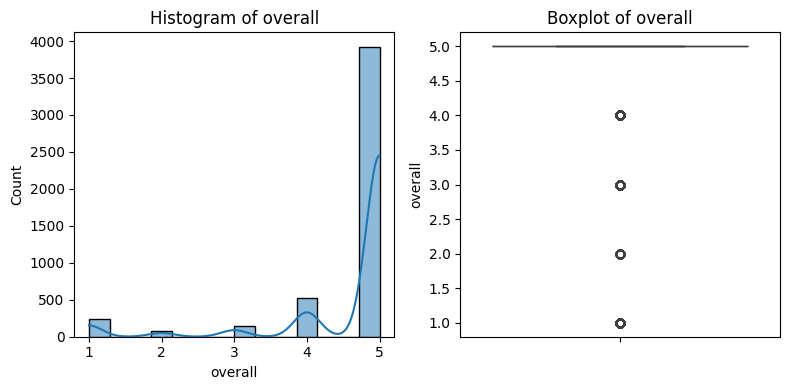

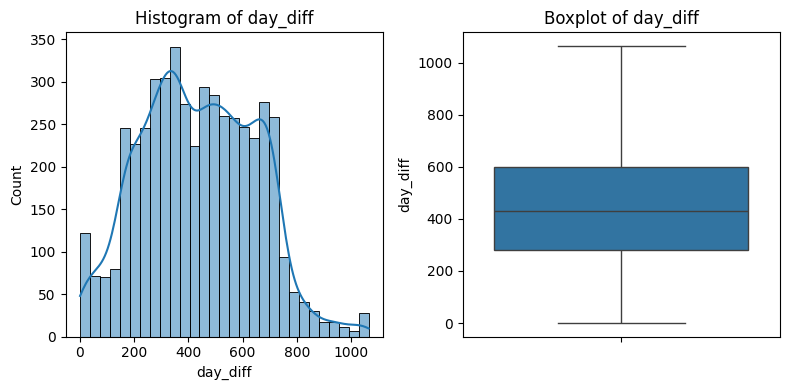

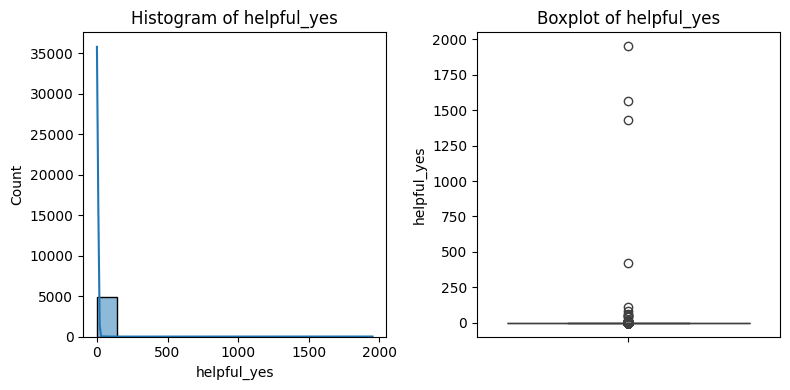

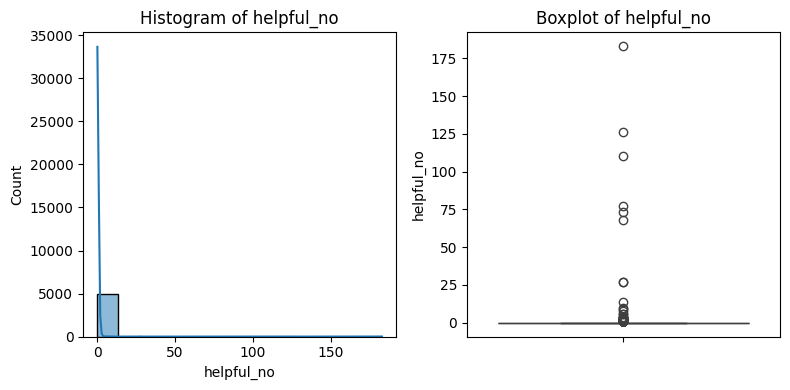

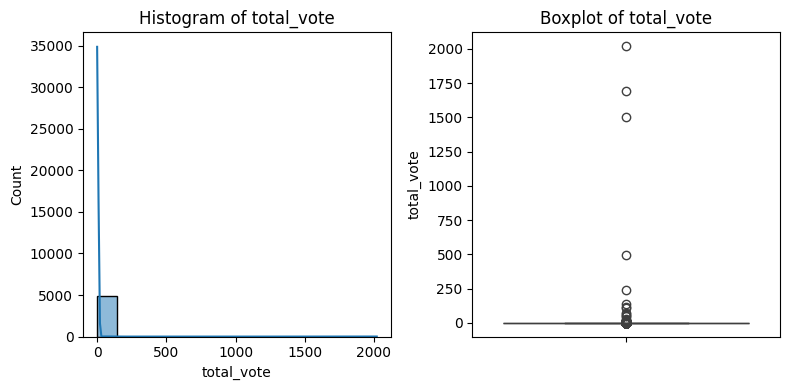

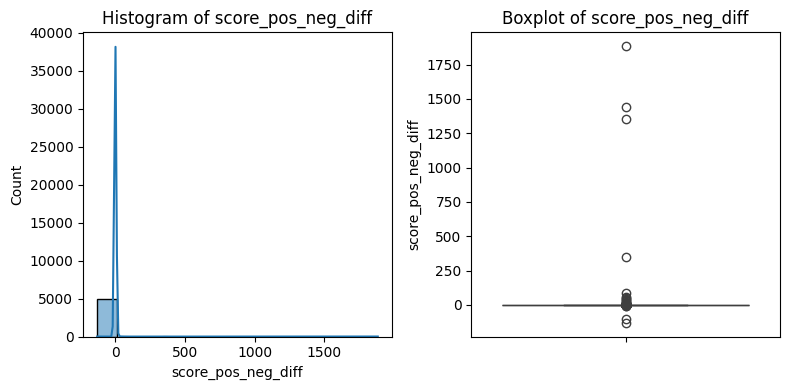

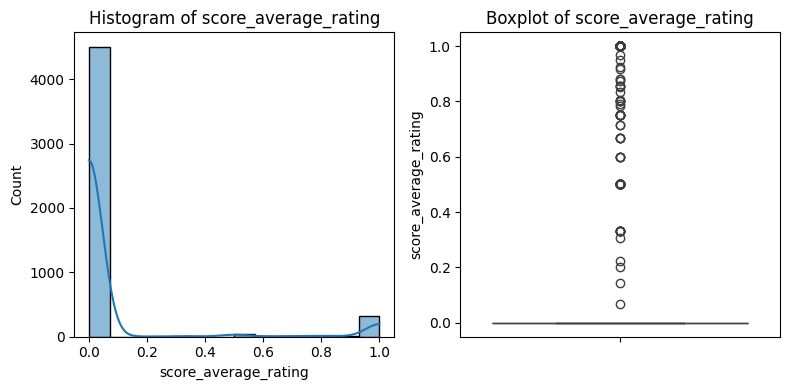

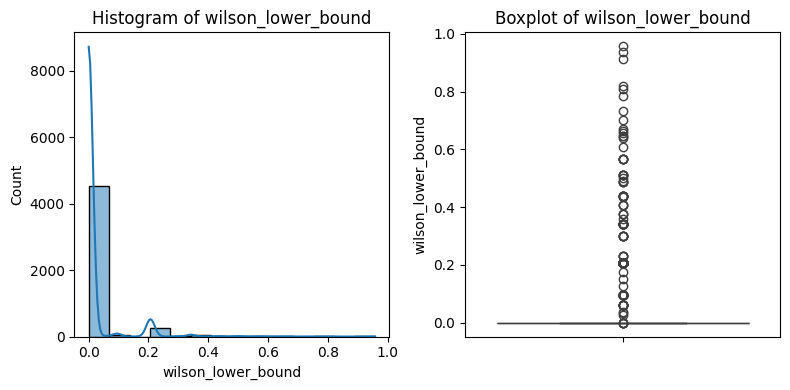

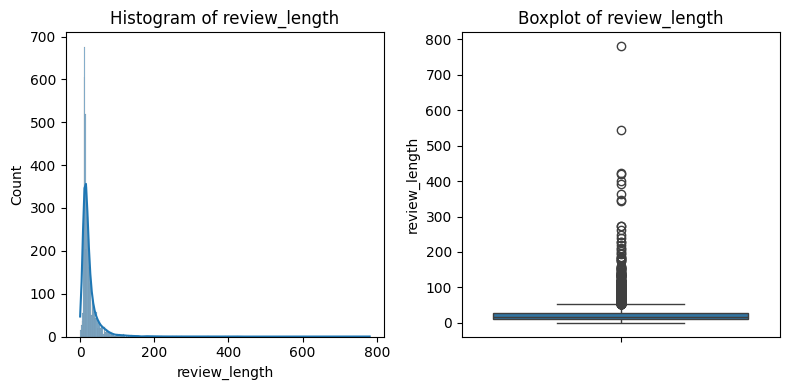

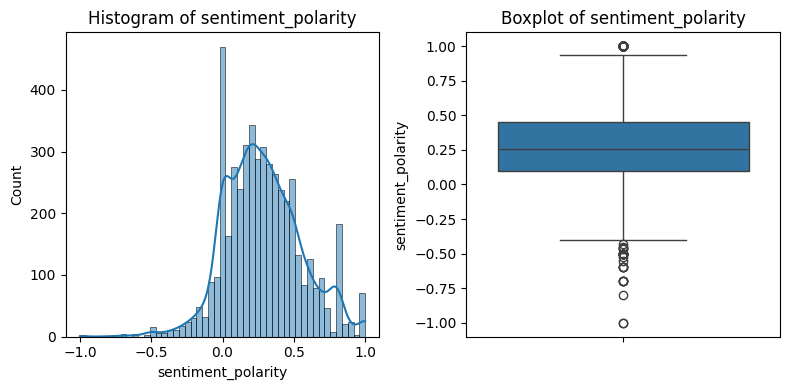

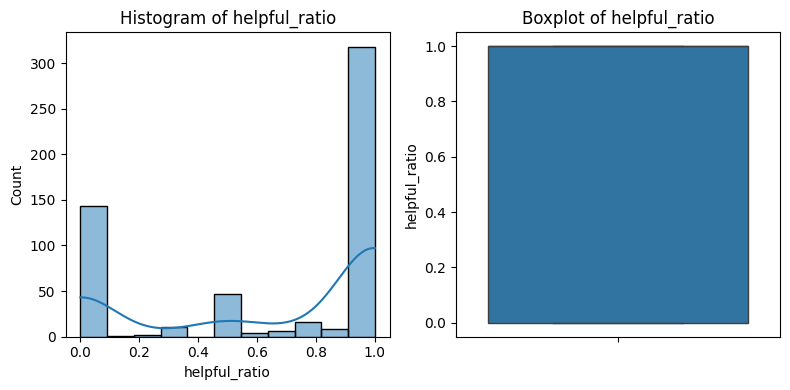

In [ ]:
# prompt: Numerical features for further analysis.

# Assuming 'df' and necessary columns are defined as in the previous code

# Numerical features already present in the dataset:
numerical_features = ['overall', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound', 'review_length', 'sentiment_polarity']

# You can create new numerical features from existing ones if needed.
# Example:  Ratio of helpful_yes to total votes
df['helpful_ratio'] = df['helpful_yes'] / df['total_vote']


# Further analysis could include:

# 1. Correlation analysis:
correlation_matrix = df[numerical_features + ['helpful_ratio']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 2. Descriptive statistics for each feature:
for col in numerical_features + ['helpful_ratio']:
  print(f"\nDescriptive Statistics for {col}:")
  print(df[col].describe())

# 3. Histograms and boxplots for distributions:

for col in numerical_features + ['helpful_ratio']:
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram of {col}')

  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()

# 4. Outlier detection and treatment:
# (Consider methods like IQR or Z-scores to identify and handle outliers,
# depending on the specific analysis and the nature of the data).


# 5. Feature scaling (if required for certain models):
# For example, use MinMaxScaler or StandardScaler to scale features to a specific range.

# ... Add further analysis as required ...




                       overall  day_diff  helpful_yes  helpful_no  total_vote  \
overall               1.000000 -0.092597    -0.031213   -0.066144   -0.035473   
day_diff             -0.092597  1.000000     0.038783    0.029656    0.039286   
helpful_yes          -0.031213  0.038783     1.000000    0.592746    0.997300   
helpful_no           -0.066144  0.029656     0.592746    1.000000    0.650292   
total_vote           -0.035473  0.039286     0.997300    0.650292    1.000000   
score_pos_neg_diff   -0.026238  0.037970     0.996607    0.524444    0.987871   
score_average_rating -0.153002  0.127245     0.104097    0.084578    0.105902   
wilson_lower_bound   -0.138549  0.136787     0.338134    0.272397    0.343784   
review_length        -0.255840  0.137563     0.447915    0.299127    0.449772   
sentiment_polarity    0.276941 -0.025197    -0.012495   -0.029308   -0.014459   
helpful_ratio         0.275820  0.063631     0.055493   -0.065512    0.046447   

                      score

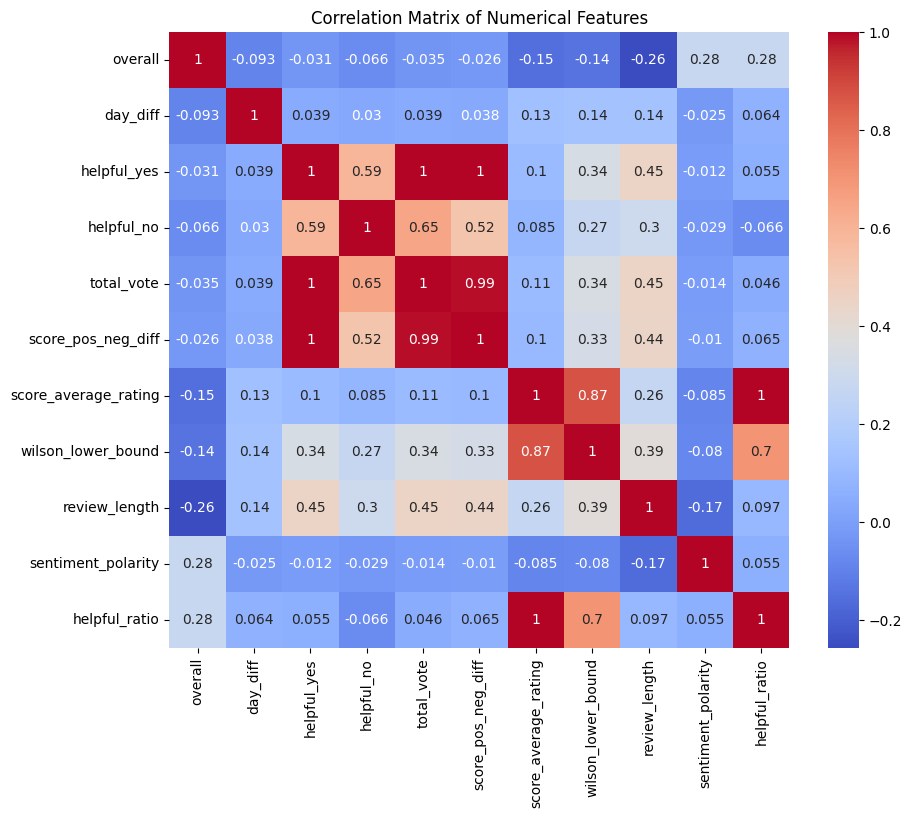

In [ ]:
# prompt: Compute correlation for numerical features.

# Assuming 'df' and necessary columns are defined as in the previous code

# Numerical features already present in the dataset:
numerical_features = ['overall', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound', 'review_length', 'sentiment_polarity']

# You can create new numerical features from existing ones if needed.
# Example:  Ratio of helpful_yes to total votes
df['helpful_ratio'] = df['helpful_yes'] / df['total_vote']


# Calculate the correlation matrix
correlation_matrix = df[numerical_features + ['helpful_ratio']].corr()

# Display the correlation matrix
print(correlation_matrix)

# You can visualize the correlation matrix using a heatmap if you prefer:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# prompt: Select important features (e.g., review length, polarity).

# Assuming 'df' and necessary columns are defined as in the previous code

# Select important features
important_features = ['review_length', 'sentiment_polarity', 'overall', 'wilson_lower_bound']  # Add other relevant features

# You can further analyze or use these features for modeling
print(df[important_features].head())


   review_length  sentiment_polarity  overall  wilson_lower_bound
0              1            0.000000      4.0                 0.0
1             13           -0.100000      5.0                 0.0
2             14            0.129167      4.0                 0.0
3             28            0.250000      5.0                 0.0
4             34            0.386667      5.0                 0.0


In [ ]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and you have a target variable column named 'target'
# Replace 'target' with the actual name of your target variable column
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation


KeyError: "['target'] not found in axis"

In [ ]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and you have a target variable column named 'overall'
# Replace 'overall' with the actual name of your target variable column if it's different
X = df.drop('overall', axis=1)  # Changed 'target' to 'overall'


In [ ]:
# prompt: Split the dataset into training (80%) and testing (20%) sets

y = df['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation


In [ ]:
# prompt: Train the following models:
# Logistic Regression
# Random Forest
# Support Vector Machine (SVM)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)


# Evaluate the models
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")
print(classification_report(y_test, logreg_pred))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

print("\nSupport Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))


ValueError: could not convert string to float: 'Nick Wilson'

In [ ]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and you have a target variable column named 'overall'
# Replace 'overall' with the actual name of your target variable column if it's different
# Select only numerical features for X
X = df[['review_length', 'sentiment_polarity', 'wilson_lower_bound']]  # Select relevant numerical features

y = df['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation

In [ ]:
# prompt: Evaluate models using:
# Accuracy
# Precision
# Recall
# F1 Score

# Initialize the models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)


# Evaluate the models
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")
print(classification_report(y_test, logreg_pred))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

print("\nSupport Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))


Logistic Regression:
Accuracy: 0.7955239064089522
              precision    recall  f1-score   support

         1.0       0.20      0.04      0.07        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00       106
         5.0       0.80      1.00      0.89       782

    accuracy                           0.80       983
   macro avg       0.20      0.21      0.19       983
weighted avg       0.65      0.80      0.71       983


Random Forest:
Accuracy: 0.7436419125127162
              precision    recall  f1-score   support

         1.0       0.23      0.16      0.19        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.10      0.04      0.05       106
         5.0       0.81      0.92      0.86       782

    accuracy                           0.74       983
   macro avg       0.23      0.22   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00       106
         5.0       0.80      1.00      0.89       782

    accuracy                           0.80       983
   macro avg       0.16      0.20      0.18       983
weighted avg       0.63      0.80      0.71       983



In [ ]:
# prompt: Trained models.

# Assuming 'df' and necessary columns are defined as in the previous code
# and X_train, X_test, y_train, y_test are already prepared.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")
print(classification_report(y_test, logreg_pred))

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

print("\nSupport Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))


Logistic Regression:
Accuracy: 0.7955239064089522
              precision    recall  f1-score   support

         1.0       0.20      0.04      0.07        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00       106
         5.0       0.80      1.00      0.89       782

    accuracy                           0.80       983
   macro avg       0.20      0.21      0.19       983
weighted avg       0.65      0.80      0.71       983


Random Forest:
Accuracy: 0.7426246185147508
              precision    recall  f1-score   support

         1.0       0.24      0.18      0.21        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.08      0.04      0.05       106
         5.0       0.81      0.92      0.86       782

    accuracy                           0.74       983
   macro avg       0.23      0.23   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# prompt: Performance metrics for comparison.

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming logreg_pred, rf_pred, svm_pred, and y_test are defined as in your code

# Calculate precision, recall, and F1-score for each model
models = {
    "Logistic Regression": logreg_pred,
    "Random Forest": rf_pred,
    "Support Vector Machine": svm_pred
}

for model_name, predictions in models.items():
    precision = precision_score(y_test, predictions, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"\n{model_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")



Logistic Regression:
  Precision: 0.6486
  Recall: 0.7955
  F1-score: 0.7109

Random Forest:
  Precision: 0.6673
  Recall: 0.7426
  F1-score: 0.7013

Support Vector Machine:
  Precision: 0.6348
  Recall: 0.7955
  F1-score: 0.7061


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: Evaluate the optimized model on the testing set.

# Assuming logreg_model, rf_model, svm_model, X_test, and y_test are defined from previous code

# Evaluate the models on the testing set
print("Logistic Regression:")
print(classification_report(y_test, logreg_model.predict(X_test)))

print("\nRandom Forest:")
print(classification_report(y_test, rf_model.predict(X_test)))

print("\nSupport Vector Machine:")
print(classification_report(y_test, svm_model.predict(X_test)))


Logistic Regression:
              precision    recall  f1-score   support

         1.0       0.20      0.04      0.07        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00       106
         5.0       0.80      1.00      0.89       782

    accuracy                           0.80       983
   macro avg       0.20      0.21      0.19       983
weighted avg       0.65      0.80      0.71       983


Random Forest:
              precision    recall  f1-score   support

         1.0       0.24      0.18      0.21        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.08      0.04      0.05       106
         5.0       0.81      0.92      0.86       782

    accuracy                           0.74       983
   macro avg       0.23      0.23      0.22       983
weighted avg       0.67      0.74      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Support Vector Machine:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        50
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        25
         4.0       0.00      0.00      0.00       106
         5.0       0.80      1.00      0.89       782

    accuracy                           0.80       983
   macro avg       0.16      0.20      0.18       983
weighted avg       0.63      0.80      0.71       983



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


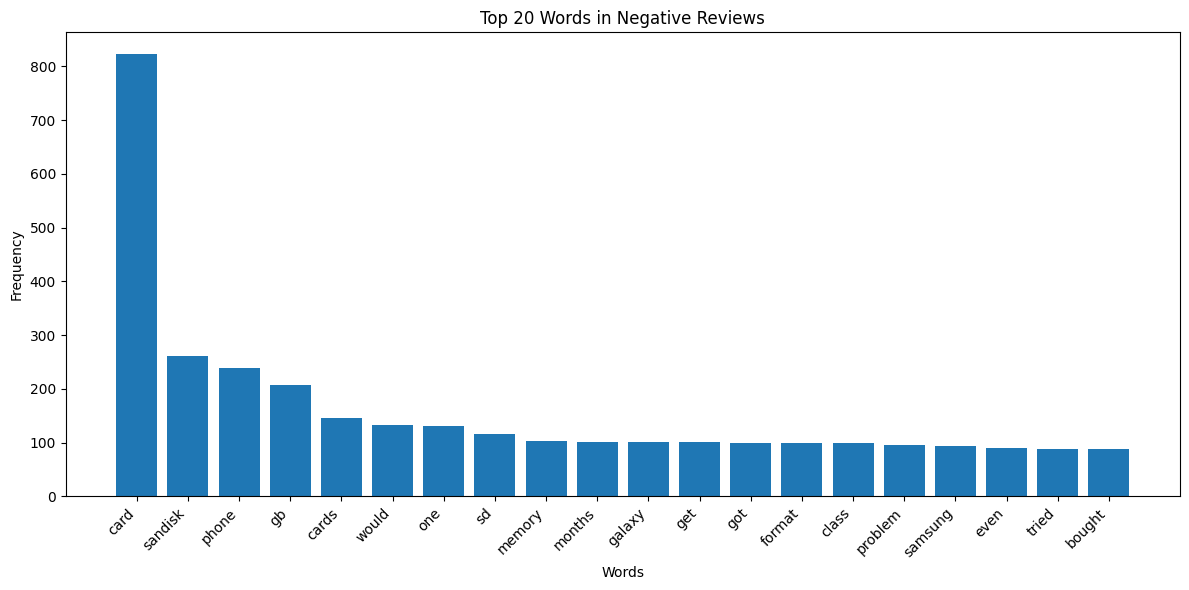

In [ ]:
# prompt: Identify key factors contributing to negative reviews.

# Assuming 'df' and 'sentiment' column are defined as in the previous code

# Filter for negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Combine all negative reviews into a single string
all_negative_words = ' '.join(negative_reviews.astype(str))

# Tokenize the combined string and count word frequencies
word_counts = Counter(all_negative_words.split())

# Get the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Extract words and frequencies
words, frequencies = zip(*top_20_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Negative Reviews")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Provide actionable recommendations for improving customer satisfaction.

# Analyze negative reviews to identify recurring issues.
negative_reviews = df[df['sentiment'] == 'negative']
# Example: Count occurrences of specific keywords related to product quality, shipping, or customer service.
# Example:  negative_reviews['reviewText'].str.contains('shipping').sum()
# Example:  negative_reviews['reviewText'].str.contains('quality').sum()

# Group negative reviews by product or category for more specific insights.
# Example:  negative_reviews.groupby('product_category')['reviewText'].count().sort_values(ascending=False)

# Analyze the length of negative reviews. Longer reviews might indicate more complex problems.
# Example: negative_reviews['review_length'].describe()


# Improve Customer Service Based on Negative Reviews

# 1. Address Shipping Issues:
# If "shipping" or "delivery" are frequently mentioned in negative reviews, investigate potential problems with shipping times, packaging, or carriers.
# Actions: Optimize shipping processes, improve packaging, negotiate better delivery rates with carriers, communicate shipping information clearly.

# 2. Product Quality Problems:
# If "quality" or "defect" appear frequently, analyze the types of defects reported and identify root causes in the manufacturing process.
# Actions: Improve quality control procedures, invest in better materials, redesign product components if necessary, provide more detailed product information to customers.

# 3. Customer Service Failures:
# Analyze negative reviews related to customer service interactions. Look for recurring complaints about response times, helpfulness, or resolution efficiency.
# Actions: Implement training for customer service representatives, improve response times, provide clear and concise instructions or FAQs, use automated responses to handle common queries.


# Analyze positive reviews to identify what aspects of the product or service customers appreciate.
positive_reviews = df[df['sentiment'] == 'positive']
# Example:  positive_reviews['reviewText'].str.contains('great').sum()

# Identify features or aspects frequently mentioned in positive reviews.
# Example:  positive_reviews.groupby('product_feature')['reviewText'].count().sort_values(ascending=False)

# Explore the sentiment polarity scores of reviews with extreme lengths (very short or very long).
# This might indicate overly enthusiastic or frustrated customers.
# Example:  df.groupby(pd.cut(df['review_length'], bins=5))['sentiment_polarity'].mean()


# Improve Product/Service based on Positive Reviews

# 1.  Enhance Popular Features:
# If certain product features are frequently praised in positive reviews, consider enhancing those features or developing related products.

# 2. Address minor issues (pre-emptive):
# Although positive reviews indicate satisfaction, look for areas where even satisfied customers expressed minor frustrations.
# Example: Although happy with a feature, a customer mentions difficulty with usage instructions - this could be improved.

# 3. Targeted Marketing:
# Leverage the frequent positive words to inform marketing campaigns and to more effectively highlight what customers find appealing.

# General Improvements:

# Proactive communication
# Implement a system for responding to negative reviews promptly and empathetically. Publicly acknowledge and address concerns to show customers that you value their feedback.

# Regular Surveys
# Conduct regular customer surveys to collect feedback and measure satisfaction levels over time. This provides a more structured way to identify recurring problems and measure the effectiveness of changes made.

# Sentiment Monitoring Tools
# Explore automated sentiment monitoring tools that can process large volumes of customer feedback from various sources (reviews, social media, etc.) to quickly identify emerging trends and issues.


IndexError: index 4 is out of bounds for axis 1 with size 3

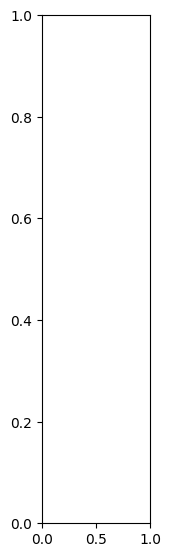

In [ ]:
# prompt: Use SHAP or LIME for model interpretability.

!pip install shap
import shap

# Assuming you have a trained model (e.g., rf_model) and X_test data
# ... (your existing code for model training and data preparation) ...

# Assuming rf_model is your RandomForestClassifier
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])


IndexError: index 4 is out of bounds for axis 1 with size 3

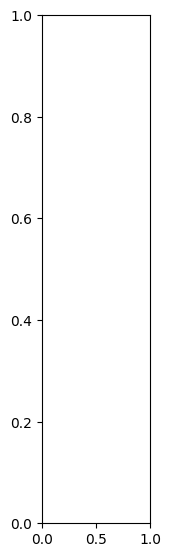

In [ ]:
# Assuming rf_model is your RandomForestClassifier and X_test contains only the selected numerical features

# 1. Get the feature names used during training
training_features = rf_model.feature_names_in_

# 2. Create a subset of X_test with only the features used during training
X_test_subset = X_test[[col for col in training_features if col in X_test.columns]]

# 3. Generate SHAP values for the subset of features
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)

# 4. Now, create the summary plot using the subset of features
shap.summary_plot(shap_values, X_test_subset)

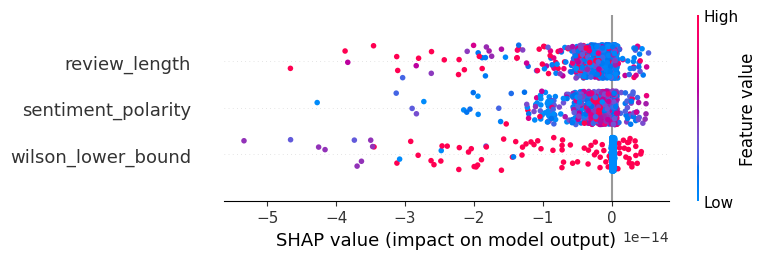

In [ ]:
# Assuming rf_model is your RandomForestClassifier and X_test contains only the selected numerical features

# 1. Get the feature names used during training
training_features = rf_model.feature_names_in_

# 2. Create a subset of X_test with only the features used during training
X_test_subset = X_test[[col for col in training_features if col in X_test.columns]]

# 3. Generate SHAP values for the subset of features
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_subset)

# 4. Check if the problem is multi-class
#    (If 'overall' has more than 2 unique values, it's multi-class)
if len(rf_model.classes_) > 2:
    # For multi-class, average SHAP values across classes for the summary plot:
    shap_values = shap_values.mean(axis=2)  # Average across class dimension (axis=2)

# 5. Now, create the summary plot using the subset of features and potentially averaged SHAP values
shap.summary_plot(shap_values, X_test_subset)